# Pythonハンズオン

# ライブラリの読み込み

In [98]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression,LinearRegression
import random

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot
%matplotlib inline

# 小数第3位まで表示
%precision 3

# ランダムシードの固定
np.random.seed(0)

# データの読み込み
[データ項目](https://raw.githubusercontent.com/kabigon-ds/uec_de/master/KIELMC.txt)

In [2]:
#GitHubからパネルデータを読み込む（Pandas）
df = pd.read_csv('https://raw.githubusercontent.com/kabigon-ds/uec_de/master/KIELMC.csv')

#データ項目・型を表示する
df.info()
#各データ項目の要約統計量を算出
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 25 columns):
year        321 non-null int64
age         321 non-null int64
agesq       321 non-null int64
nbh         321 non-null int64
cbd         321 non-null int64
intst       321 non-null int64
lintst      321 non-null float64
price       321 non-null int64
rooms       321 non-null int64
area        321 non-null int64
land        321 non-null int64
baths       321 non-null int64
dist        321 non-null int64
ldist       321 non-null float64
wind        321 non-null int64
lprice      321 non-null float64
y81         321 non-null int64
larea       321 non-null float64
lland       321 non-null float64
y81ldist    321 non-null float64
lintstsq    321 non-null float64
nearinc     321 non-null int64
y81nrinc    321 non-null int64
rprice      321 non-null float64
lrprice     321 non-null float64
dtypes: float64(9), int64(16)
memory usage: 62.8 KB


,year,age,agesq,nbh,cbd,intst,lintst,price,rooms,area,...,lprice,y81,larea,lland,y81ldist,lintstsq,nearinc,y81nrinc,rprice,lrprice
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,...,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,1979.327103,18.009346,1381.566978,2.208723,15822.429907,16442.367601,9.480513,96100.660436,6.585670,2106.728972,...,11.378118,0.442368,7.597232,10.301858,0.710180,90.482246,0.299065,0.124611,83721.355483,11.261377
std,1.492329,32.565845,4801.788757,2.164353,8967.106296,9033.130652,0.777165,43223.728867,0.901204,694.957902,...,0.438174,0.497443,0.340723,0.801751,2.175118,14.066470,0.458563,0.330792,33118.785771,0.387900
min,1978.000000,0.000000,0.000000,0.000000,1000.000000,1000.000000,6.907800,26000.000000,4.000000,735.000000,...,10.165850,0.000000,6.599871,7.444249,0.000000,47.717700,0.000000,0.000000,26000.000000,10.165850
25%,1978.000000,0.000000,0.000000,0.000000,9000.000000,9000.000000,9.105000,65000.000000,6.000000,1560.000000,...,11.082140,0.000000,7.352441,9.737138,0.000000,82.901020,0.000000,0.000000,59000.000000,10.985290
50%,1978.000000,4.000000,16.000000,2.000000,14000.000000,16000.000000,9.680300,85900.000000,7.000000,2056.000000,...,11.360940,0.000000,7.628518,10.681890,0.000000,93.708210,0.000000,0.000000,82000.000000,11.314470
75%,1981.000000,22.000000,484.000000,4.000000,23000.000000,24000.000000,10.086000,120000.000000,7.000000,2544.000000,...,11.695250,1.000000,7.841493,10.738570,0.417355,101.727400,1.000000,0.000000,100230.400000,11.515230
max,1981.000000,189.000000,35721.000000,6.000000,35000.000000,34000.000000,10.434000,300000.000000,10.000000,5136.000000,...,12.611540,1.000000,8.544030,13.207620,10.463100,108.868400,1.000000,1.000000,300000.000000,12.611540


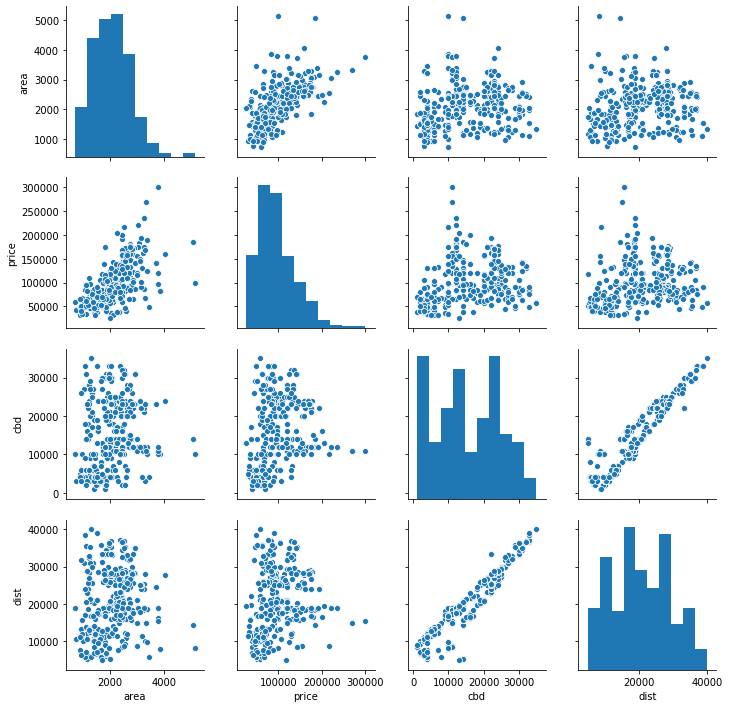

In [5]:
#散布図を表示（全変数：表示まで時間がかかる）
#sns.pairplot(data=df)
#散布図を表示（一部変数）
sns.pairplot(data=df[["area","price","cbd","dist"]])

# 相関のみられる散布図を確認

相関係数： 0.6453392722602301


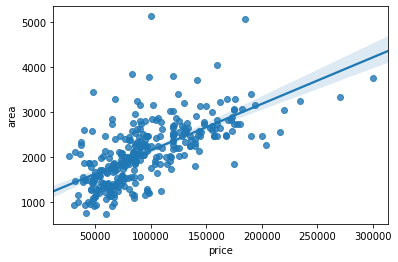

In [6]:
#cbdとdistでも可
#priceとareaの散布図（回帰線付き）を表示
sns.regplot(x="price",y="area",data=df)

#相関係数の算出（相関r=0.645）
print("相関係数：",df.corr()["price"]["area"])

# 回帰分析の実装
線形性がみられる変数間で単回帰分析を行う

In [7]:
# 説明変数にprice(住宅価格)を利用
X = df[['price']]
 
# 目的変数にarea(住宅面積)を利用
Y = df[['area']]

#最小二乗法（OLS）での回帰分析を実行
model = sm.OLS(Y, X)
res = model.fit()
#モデルの要約を表示
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                   area   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              2909.
Date:                Sat, 08 Aug 2020   Prob (F-statistic):                   1.12e-162
Time:                        04:37:36   Log-Likelihood:                         -2557.6
No. Observations:                 321   AIC:                                      5117.
Df Residuals:                     320   BIC:                                      5121.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# 検定（正規性の検定）
ある変数が正規性（正規分布に従う）を持つかどうかを検定する。<br>
今回はより一般的なKS検定（Kolmogorov–Smirnov test）を実装する。

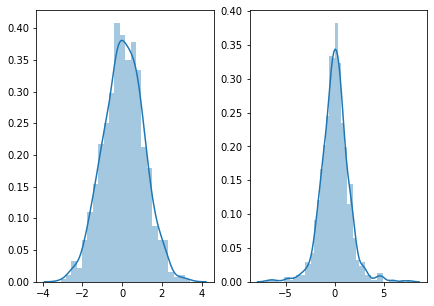

In [18]:
#描画領域の設定
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(7, 5))

#正規分布従う変数を発生させる
x = stats.norm.rvs(size=1000)
#ヒストグラム描画
sns.distplot(x,kde=True,ax=ax1)

#t分布に従う変数を発生させる
y = stats.t.rvs(3,size=1000)
#ヒストグラム描画
sns.distplot(y,kde=True,ax=ax2)

In [19]:
#KS検定(　p>0.05 なので　正規分布である）
print(stats.kstest(x,"norm"))

#KS検定(　p<0.05　なので　正規分布でない）
print(stats.kstest(y,"norm"))

KstestResult(statistic=0.03764999960443144, pvalue=0.11448983640813809)
KstestResult(statistic=0.06014685931800756, pvalue=0.0013788598601741356)


# 確率プロット（Q-Qプロット）による正規性の確認
検定ではなく、確率プロットによって正規性を"視認”することが出来る

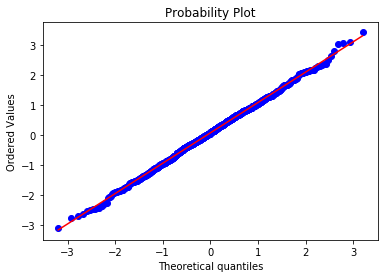

In [33]:
#probplotで引数"norm"を指定する (対角線に沿ったプロットとなっている)
stats.probplot(x, dist="norm",plot=plt)
plt.show()

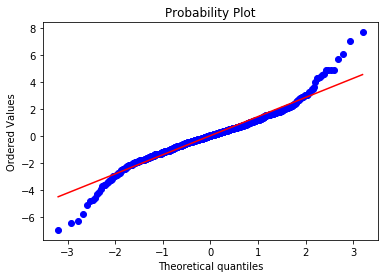

In [34]:
#probplotで引数"norm"を指定する (湾曲したプロットとなる)
stats.probplot(y, dist="norm",plot=plt)
plt.show()

# 平均値の差の検定
ある二つのデータ群があった時それらの平均値（または代表値）が異なるか否かを検定する。<br>
検定には正規性や等分散性の有無によってそれぞれ選択する手法が異なる

In [35]:
#シミュレーションデータの生成

#平均0分散1正規分布従う変数を発生させる
x1 = stats.norm.rvs(loc=0, scale=1, size=1000)

#平均1分散1正規分布従う変数を発生させる
y1 = stats.norm.rvs(loc=1, scale=1, size=1000)

## 正規性の確認
Scipyパッケージにおけるkstestでは、"norm"を指定した際は、（標準）正規分布との検定となる。<br>
そのため平均が0、分散が1とならないデータについては都度分布を定義する必要がある。

In [36]:
#正規性の検定(　p>0.05　のため　正規分布である）
print(stats.kstest(x1,"norm"))

#正規性の検定（パラメータ調整）(　p>0.05　のため　正規分布である）
loc, scale = stats.norm.fit(y1)
n = stats.norm(loc=loc, scale=scale)
print(stats.kstest(y1,n.cdf))

KstestResult(statistic=0.020961183279198825, pvalue=0.7718458334944787)
KstestResult(statistic=0.021562082699483565, pvalue=0.7411940421079453)


## 等分散性の確認
等分散性の有無により、検定手法が異なるため確認を実施する。<br>
今回は、ルビン検定（Levene検定）を実装する。

In [37]:
#ルビーン検定（Levene検定）により判断　p>0.05　のため　等分散性あり
stats.levene(x1,y1,center='mean')

LeveneResult(statistic=0.34675127156327046, pvalue=0.5560245081381867)

# スチューデントのt検定（対応なし）
正規性・等分散性が認められ、また対応のないデータであることから「スチューデントのt検定」を採用

Ttest_indResult(statistic=-23.54415417988589, pvalue=2.227771010275542e-108)


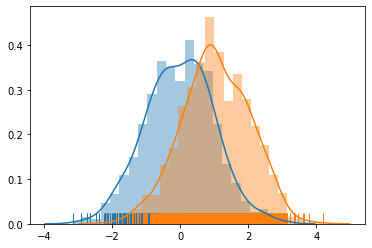

In [38]:
# p<0.05 より二つの平均値には差がある事が示された
print(stats.ttest_ind(x1, y1, equal_var=True))

#分布にて両データの形状を確認
sns.distplot(x1,kde=True,rug=True)
sns.distplot(y1,kde=True,rug=True)

# 正規性を満たさない時
前述のように正規分布に従わない分布の場合は、「代表値」を検定する手法を用いる。

In [39]:
#正規分布でない変数を生成

#コーシー分布に従う変数を発生させる
x2 = stats.cauchy.rvs(size=1000)
#t分布に従う変数を発生させる
y2 = stats.expon.rvs(size=1000)

## 正規性の確認

In [40]:
#正規性の検定（パラメータ調整）(　p<0.05　のため　正規分布でない）
loc, scale = stats.norm.fit(x2)
n = stats.norm(loc=loc, scale=scale)
print(stats.kstest(x2,n.cdf))

#正規性の検定（パラメータ調整）(　p<0.05　のため　正規分布でない）
loc, scale = stats.norm.fit(y2)
n = stats.norm(loc=loc, scale=scale)
print(stats.kstest(y2,n.cdf))

KstestResult(statistic=0.45074485773902007, pvalue=5.7042877433120965e-186)
KstestResult(statistic=0.15424841048340338, pvalue=3.0482730480710295e-21)


## ウィルコクソンの順位和検定（サンプル数一致）
サンプル数が異なる場合は、マンホイットニーのU検定を選択する。

In [41]:
#　p<0.05　のため　2群の「代表値」には差がある事が示される
stats.wilcoxon(x2, y2)

WilcoxonResult(statistic=150758.0, pvalue=1.2774655706603298e-27)

# 因果推論（差分の差分法：Difference-In-Differences）
ごみ焼却場建設の噂は、78年～81年にかけての住宅価格に影響を与えたか？

In [42]:
#交絡変数(did)を定義
df["did"] = df["y81"]*df["nearinc"]

#データを分割（1981年と1978年）
df_81 = df[df["y81"]==1]
df_78 = df[df["y81"]==0]

## 住宅価格の推計（回帰によるDID推定）

In [44]:
#説明変数Xの定義
X = df[["nearinc","y81","did"]]

#定数項の追加
X = sm.add_constant(X)

#目的変数Yの定義
Y = df[["rprice"]]

#重回帰モデルの実装
model = sm.OLS(Y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rprice   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     22.25
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           4.22e-13
Time:                        05:21:34   Log-Likelihood:                -3765.2
No. Observations:                 321   AIC:                             7538.
Df Residuals:                     317   BIC:                             7554.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.252e+04   2726.910     30.260      0.0

## 集計によるDIDの算出

year  nearinc     year_1978     year_1981           gap  gap_rate
0           0  82517.227642  101307.51451  18790.286868  0.227714
1           1  63692.857143   70619.24075   6926.383607  0.108747


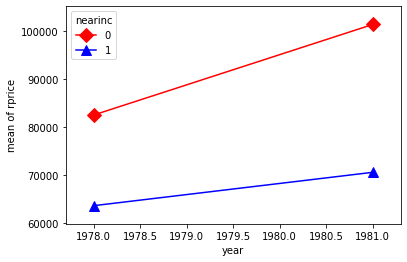

In [49]:
#集計によるDID算出
grp_summary = df.pivot_table(
    values="rprice", index=['nearinc'], columns=['year'], aggfunc='mean').add_prefix('year_').reset_index()
grp_summary['gap'] = grp_summary.year_1981 - grp_summary.year_1978
grp_summary['gap_rate'] = grp_summary.year_1981 / grp_summary.year_1978 - 1  
print(grp_summary)

#交絡プロット用データ生成
int_data = pd.DataFrame([[1981,70619.24075,1],[1981,101307.51451,0],[1978,63692.857143,1],[1978,82517.227642,0]],columns=["year","rprice","nearinc"])
#交絡プロット描画
interaction_plot(int_data.year,int_data.nearinc,int_data.rprice,colors=['red','blue'],markers=['D','^'], ms=10)
plt.show()

# 傾向スコア（Propensity Score）の実装
介入（焼却場設置の噂の流布）後において、焼却場との距離が本当に住宅価格に影響を与えているのか？ 傾向スコアの類似する群でその差を測る。<br>
今回は、ロジスティック回帰を用いて傾向スコアを算出する。

In [94]:
#81年のデータで説明変数を定義
X = df_81[["age","nbh","cbd","intst","rooms","area","land","baths"]]
#81年のデータで目的変数を定義（焼却場に近いか否か）
Z = df_81[["nearinc"]]

Y = df_81[["rprice"]]

#ロジスティック回帰の実行
reg = LogisticRegression(max_iter=1000,solver="lbfgs").fit(X,Z)

print("beta:",reg.coef_)
print("alpha:",reg.intercept_)

beta: [[ 1.096e-02  1.284e+00 -3.336e-03  2.107e-03  1.239e+00  2.283e-04
   3.383e-05 -8.581e-01]]
alpha: [1.189]


C:\Users\kabigon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
#傾向スコアの確認
Z_pre = reg.predict_proba(X)
#傾向スコア
print(Z_pre[0:10])
print("-----")
#正解
print(Z[0:10])

[[4.158e-02 9.584e-01]
 [8.037e-04 9.992e-01]
 [3.426e-04 9.997e-01]
 [2.745e-04 9.997e-01]
 [2.248e-02 9.775e-01]
 [2.094e-04 9.998e-01]
 [3.707e-01 6.293e-01]
 [5.812e-01 4.188e-01]
 [9.917e-01 8.251e-03]
 [1.000e+00 2.024e-06]]
-----
     nearinc
179        1
180        1
181        1
182        1
183        1
184        1
185        1
186        0
187        0
188        0


# 傾向スコアマッチング

In [97]:
#Propensity score matching
psm_data = pd.DataFrame()
psm_data["ps"] = Z_pre[:, 1]
psm_data["nearinc"] = Z.values
psm_data["rprice"] = df_81["rprice"].values

interval = np.arange(0,1.2,0.2)
match_list = []
for i in range(0,len(interval)-1):
    temp0 = psm_data[(psm_data["nearinc"]==0) & (interval[i] < psm_data["ps"]) & (psm_data["ps"] < interval[i+1])]
    temp1 = psm_data[(psm_data["nearinc"]==1) & (interval[i] < psm_data["ps"]) & (psm_data["ps"] < interval[i+1])]
    if (len(temp0) > 0) & (len(temp1) > 0):
        match_list.append(temp1["rprice"].mean()-temp0["rprice"].mean())

np.mean(match_list)

7968.514999999999

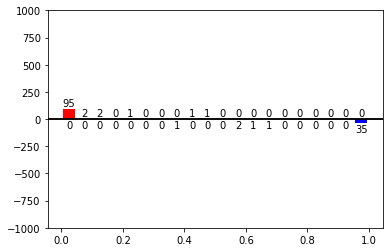

In [99]:
#可視化
propensity0 = psm_data.ps[psm_data.nearinc==0]
propensity1 = psm_data.ps[psm_data.nearinc==1]

bins = np.arange(0, 1.05, 0.05)
top0, _ = np.histogram(propensity0, bins=bins)
top1, _ = np.histogram(propensity1, bins=bins)

plt.ylim(-1000,1000)
plt.axhline(0, c="black")
plt.bar(bins[:-1]+ 0.025, top0, width=0.04, facecolor="red")
plt.bar(bins[:-1]+ 0.025, -top1, width=0.04, facecolor="blue")
plt.axhline(0, c="black")

for x, y in zip(bins, top0):
    plt.text(x + 0.025, y + 10, str(y), ha="center", va="bottom")

for x, y in zip(bins, top1):
    plt.text(x + 0.025, -y - 10, str(y), ha="center", va="top")

### 【左】を【右】のように揃える事が出来る


<tr>
       <td> <img src="https://cdn-ak.f.st-hatena.com/images/fotolife/h/h-wadsworth02/20190505/20190505135307.jpg" alt="Drawing" style="width: 250px;"/> </td>
       <td> <img src="https://cdn-ak.f.st-hatena.com/images/fotolife/h/h-wadsworth02/20190505/20190505135443.jpg" alt="Drawing" style="width: 250px;"/> </td>
</tr>


# ATE（平均処置効果）の算出
傾向スコアを用いる事によって、81年の住宅価格は焼却場との近さによってどの程度影響がでるのか？

In [155]:
#加重平均補正
weight_1 = 1/(np.ndarray.flatten(Z.values)/Z_pre[:, 1]).sum()
weight_0 = 1/(np.ndarray.flatten((1-Z.values))/Z_pre[:, 0]).sum()

#IPW推定量
IPW_1 =  (np.ndarray.flatten(Y.values*Z.values)/Z_pre[:, 1]).sum()
IPW_0 = (np.ndarray.flatten(Y.values*(1-Z.values))/Z_pre[:, 0]).sum()

#ATE（平均処置効果）
ATE = weight_1 * IPW_1 - weight_0 * IPW_0
print("推定したATE", ATE)

推定したATE -28107.988020945995


# DR法（Doubly Robust法）
傾向スコアが0に近いようなとき、ATEの計算が不安定となる。 <br>
その際に使用する手法。

In [103]:
#説明変数の定義
X1 = df_81[["age","nbh","cbd","intst","rooms","area","land","baths","nearinc"]]
#目的変数の定義
Y1 = df_81[["rprice"]]

#重回帰分析の実行
reg2 = LinearRegression().fit(X1,Y1)

#Zが0の時の処理
X1_0 = X1.copy()
X1_0["nearinc"] = 0
Y1_0 = reg2.predict(X1_0)

#Zが1の時の処理
X1_1 = X1.copy()
X1_1["nearinc"] = 1
Y1_1 = reg2.predict(X1_1)

In [161]:
ATE_1_i = np.ndarray.flatten(Y.values*Z.values)/Z_pre[:,1] + (1-np.ndarray.flatten(Z.values)/Z_pre[:,1])*Y1_1.T
ATE_0_i = np.ndarray.flatten(Y.values*(1-Z.values))/Z_pre[:,0] + (1-np.ndarray.flatten((1-Z.values))/Z_pre[:,0])*Y1_0.T
ATE = 1/len(Y)*(ATE_1_i-ATE_0_i).sum()
print("推定したATE", ATE)

推定したATE -5799.9188746870395
